In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model


In [84]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [85]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [89]:
K = 10

# calculate total number of classes
# for output layer
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 

In [90]:
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [93]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 561s 359ms/step - loss: 2.2266 - accuracy: 0.1516 - val_loss: 2.3025 - val_accuracy: 0.1173
Epoch 2/10
1563/1563 [==============================] - 558s 357ms/step - loss: 2.2005 - accuracy: 0.1594 - val_loss: 2.4032 - val_accuracy: 0.0989
Epoch 3/10
1563/1563 [==============================] - 539s 345ms/step - loss: 2.2059 - accuracy: 0.1534 - val_loss: 2.3229 - val_accuracy: 0.1163
Epoch 4/10
1563/1563 [==============================] - 556s 356ms/step - loss: 2.2006 - accuracy: 0.1578 - val_loss: 2.3438 - val_accuracy: 0.1076
Epoch 5/10
1563/1563 [==============================] - 540s 346ms/step - loss: 2.1831 - accuracy: 0.1599 - val_loss: 2.1835 - val_accuracy: 0.1638
Epoch 6/10
1563/1563 [==============================] - 546s 349ms/step - loss: 2.1783 - accuracy: 0.1676 - val_loss: 2.2557 - val_accuracy: 0.1532
Epoch 7/10
1563/1563 [==============================] - 556s 356ms/step - loss: 2.1572 - accuracy: 0.1747 - val_

In [61]:

# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 

In [94]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')


In [96]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 547s 350ms/step - loss: 2.1989 - accuracy: 0.1608 - val_loss: 2.1661 - val_accuracy: 0.1708
Epoch 2/5
1563/1563 [==============================] - 519s 332ms/step - loss: 2.1593 - accuracy: 0.1754 - val_loss: 2.1527 - val_accuracy: 0.1780
Epoch 3/5
1563/1563 [==============================] - 534s 342ms/step - loss: 2.1512 - accuracy: 0.1751 - val_loss: 2.1361 - val_accuracy: 0.1758
Epoch 4/5
1563/1563 [==============================] - 527s 337ms/step - loss: 2.1272 - accuracy: 0.1746 - val_loss: 2.3655 - val_accuracy: 0.1187
Epoch 5/5
1563/1563 [==============================] - 519s 332ms/step - loss: 2.1668 - accuracy: 0.1647 - val_loss: 2.1104 - val_accuracy: 0.1734


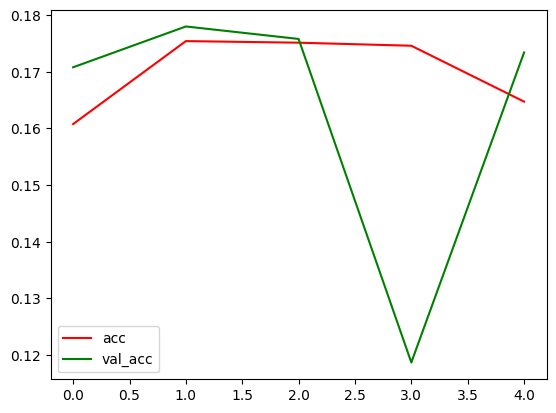

In [97]:

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

Prediction over an image

1/1 [==============================] - 0s 23ms/step
Original label is automobile and predicted label is horseship


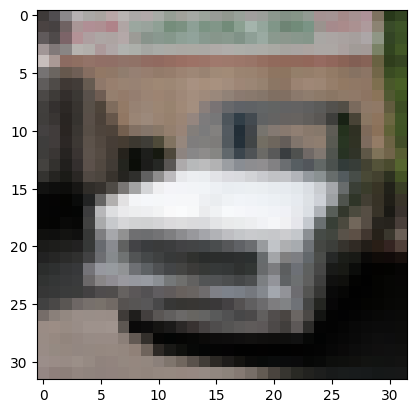

In [105]:
# label mapping
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 572

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and save the predicted label
predicted_label_index = model.predict(p).argmax()
predicted_label = labels[predicted_label_index]

# load the original label
original_label_index = np.argmax(y_test[image_number])  # Assuming y_test is one-hot encoded
original_label = labels[original_label_index]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))